In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Loading the dataset
twitter = pd.read_csv("Twitter_Data.csv")

# Displaying first few rows of the dataset
twitter.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
twitter.columns = ["Clean Text", "Category"]
twitter.head()

,Clean Text,Category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
# Dropping rows with missing values
twitter.dropna(inplace=True)

# Checking for missing values
twitter.isnull().sum()

Clean Text    0
Category      0
dtype: int64

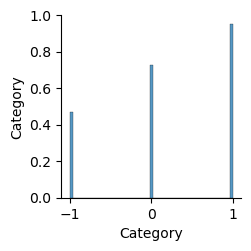

In [7]:
sns.pairplot(data = twitter)

In [8]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(twitter["Clean Text"], twitter["Category"], test_size=0.2, random_state=42)

In [9]:
# Using CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [10]:
# Initializing a Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_counts, y_train)

MultinomialNB()

In [11]:
# Making predictions on the test set
y_pred = classifier.predict(X_test_counts)

Accuracy: 0.7469472909124378
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.75      0.62      0.68      7152
         0.0       0.92      0.60      0.73     11067
         1.0       0.68      0.92      0.78     14375

    accuracy                           0.75     32594
   macro avg       0.78      0.71      0.73     32594
weighted avg       0.78      0.75      0.74     32594



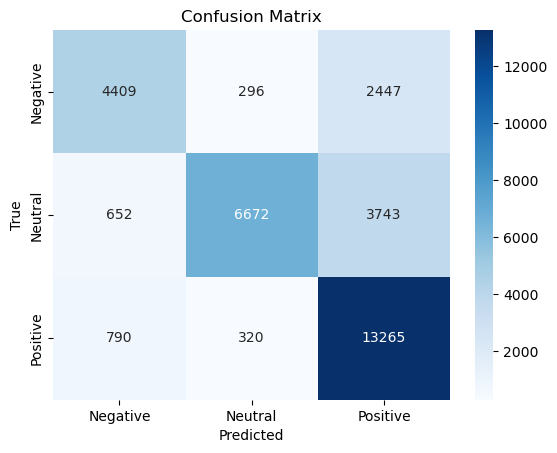

In [12]:
# Evaluating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# To Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# To Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()